<a href="https://colab.research.google.com/github/Carhuacusma/CC61_PDI_TA4_u201818067/blob/main/PDI_TA4_u201818067.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Procesamiento Digital de Imágenes - Detección y segmentación

## Objetivos:

##Ejercicio: Detección y Segmentación

### Detección de descontinuidades

En imágenes, las descontinuidades buscadas son puntos, segmentos de rectas, bordes y uniones

"La representación de los bordes en una imagen reduce significativamente la cantidad de data a ser procesada, reteniendo información esencial sobre las formas de los objetos en escena"

###Canny

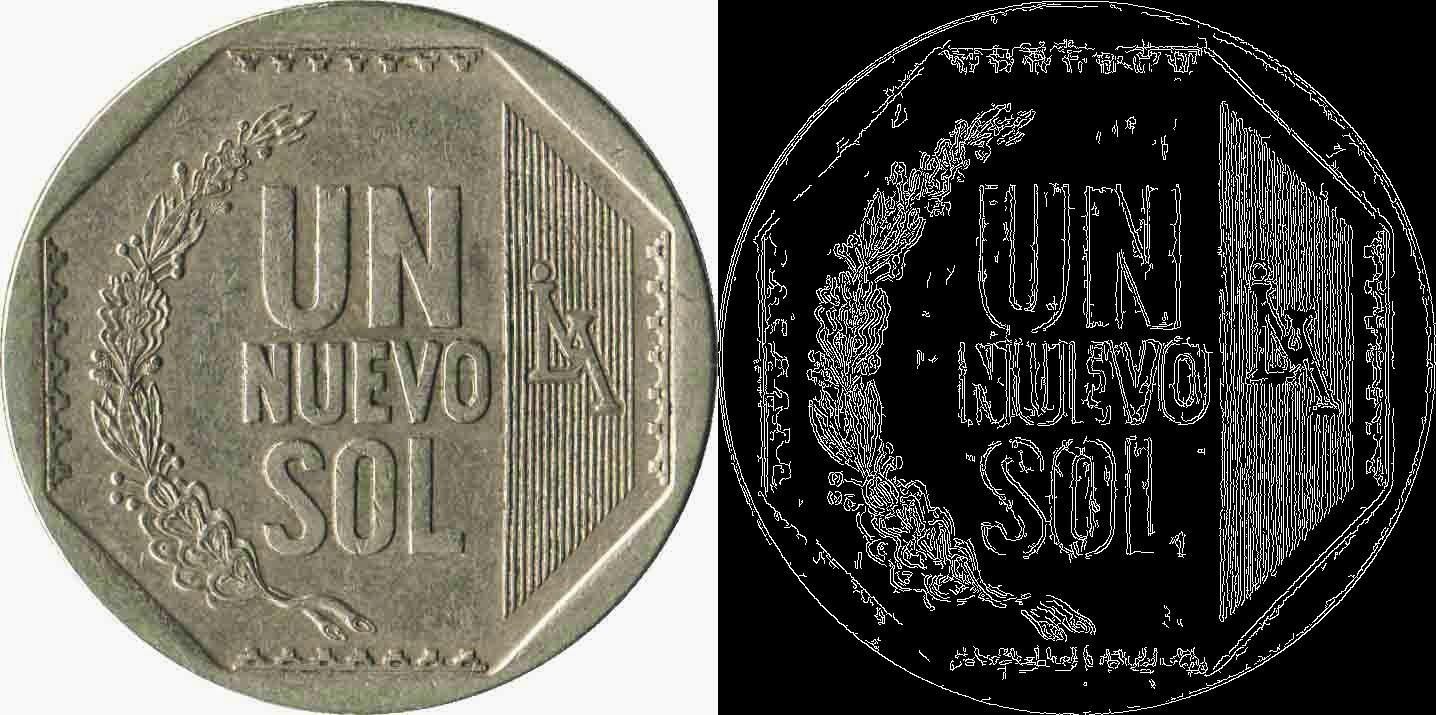

## Código

###Importando librerías

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from skimage import io, filters, img_as_ubyte
from google.colab.patches import cv2_imshow

###Operadores de Detección de bordes

#### Operador de Roberts

In [2]:
def roberts(baw, arr=[True for _ in range(2)]): # baw: Imagen en escala de grises; x,y: booleans de en qué eje aplicar
  x = arr[0]
  y = arr[1]
  m_x = np.array([[ 1, 0],
                  [ 0,-1]])
  m_y = np.array([[-1, 0],
                  [ 0, -1]])
  if x and y:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)
  elif x:
    return cv2.filter2D(baw,-1,m_x)
  elif y:
    return cv2.filter2D(baw,-1,m_y)
  else:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)

#### Operador de Sobel / Prewitt

In [3]:
def sobel_prewitt(baw, c=2, arr=[True for _ in range(2)]):
  x = arr[0]
  y = arr[1]
  m_x = np.array([[-1, 0, 1],
                  [-c, 0, c],
                  [-1, 0, 1]])
  m_y = np.array([[ 1, c, 1],
                  [ 0, 0, 0],
                  [-1,-c,-1]])
  if x and y:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)
  elif x:
    return cv2.filter2D(baw,-1,m_x)
  elif y:
    return cv2.filter2D(baw,-1,m_y)
  else:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)

#### Operador de Kirsch

In [4]:
def kirsch(baw,arr=[True for _ in range(8)]):
  mascaras = [np.array([[ 5, 5, 5],
                        [-3, 0,-3],
                        [-3,-3,-3]]),
              np.array([[-3, 5, 5],
                        [-3, 0, 5],
                        [-3,-3,-3]]),
              np.array([[-3,-3, 5],
                        [-3, 0, 5],
                        [-3,-3, 5]]),
              np.array([[-3,-3,-3],
                        [-3, 0, 5],
                        [-3, 5, 5]]),
              np.array([[-3,-3,-3],
                        [-3, 0,-3],
                        [ 5, 5, 5]]),
              np.array([[-3,-3,-3],
                        [ 5, 0,-3],
                        [ 5, 5,-3]]),
              np.array([[ 5,-3,-3],
                        [ 5, 0,-3],
                        [ 5,-3,-3]]),
              np.array([[ 5, 5,-3],
                        [ 5, 0,-3],
                        [-3,-3,-3]])]
  print(arr)    
  final = np.zeros(baw.shape,dtype=np.uint8)
  for i in range(8):
    if arr[i]:
      filtrada = cv2.filter2D(baw,-1,mascaras[i])
      final = final + filtrada
  return final

#### Función para edgeDetection

In [5]:
def edgeDetection(imagen, operador, arr = [True for _ in range(8)], c=2, usaC = False):
  # Si la imagen no está en escala de grises, convertirla a escala de grises
  if len(imagen.shape) > 2:
    imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) # Asume entrada con io.imread()
  filtrada = [] # >> Imagen Filtrada
  if usaC:
    filtrada = operador(imagen,c,arr)
  else:
    filtrada = operador(imagen,arr)
  if type(filtrada[0][0]) != np.uint8: #...Si el 'operador' es función de skimage devuelve float
    filtrada = img_as_ubyte(filtro) #..... Homogeneizar para trabajar en np.uint8 ...........
  return filtrada

Función adicional que ahorra tiempo si se va a emplear el mismo filtro con los mismos parámetros varias veces durante el algoritmo

In [67]:
def funcionFiltro(operador,arr=[True for _ in range(8)], c = 2, usaC = False, isCanny = False, minC=50,maxC=170):
  if isCanny:
    def auxCanny(imagen):
      # Si la imagen no está en escala de grises, convertirla a escala de grises
      if len(imagen.shape) > 2:
        imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) # Asume entrada con io.imread()  
      return cv2.Canny(imagen,minC,maxC)
    return auxCanny
  if usaC:
    def auxEdgeDetection(imagen):
      if len(imagen.shape) > 2:
        imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) # Asume entrada con io.imread()
      filtrada = operador(imagen,c,arr)
      return filtrada
    return auxEdgeDetection
  def auxEdgeDetection(imagen):
    if len(imagen.shape) > 2:
      imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) # Asume entrada con io.imread()
    filtrada = operador(imagen,arr)
    return filtrada
  return auxEdgeDetection


TODO
```
if type(filtrada[0][0]) != np.uint8:#...Si el 'operador' es función de skimage devuelve float
      filtrada = img_as_ubyte(filtro) #..... Homogeneizar para trabajar en np.uint8 ...........
```



### Transformada de Hough

####Círculos

In [6]:
def HoughCirculo(filtrada, distMin, maxCanny, lessError, minRadio, maxRadio, orig = [[0 for _ in range(2)]]):
  circles = cv2.HoughCircles(filtrada, cv2.HOUGH_GRADIENT, 1, distMin, 
                             param1=maxCanny, param2=lessError, minRadius=minRadio, maxRadius=maxRadio)
  aux = [] # Imagen auxiliar para imagen con circulos encima
  if len(orig) > 2:
    aux = orig.copy()
  else:
    aux = filtrada.copy()
    aux = cv2.cvtColor(aux,cv2.COLOR_GRAY2BGR)
  j = 1
  if circles is not None:
    circles = np.uint16(np.around(circles[0]))
    for i in circles:
      center = (i[0],i[1])
      radius = i[2]
      #cv2.circle(aux, center, 1, (0, 100, 100), 2) #Dibujar centro
      ## 
      aux = cv2.putText(aux, str(j), center, cv2.FONT_HERSHEY_SIMPLEX, 1, 
                        (255,0,0), 2, cv2.LINE_AA) 
      ## 
      j += 1
      cv2.circle(aux, center, radius, (255, 0, 255), 2) #Dibuja los circulos
  return circles, aux

#### Líneas

In [7]:
def HoughLineas(filtrada,minLinea = 100,maxGap = 10,orig = [[0 for _ in range(2)]]):
  aux = []
  if len(orig) > 2:
    aux = orig.copy()
  else:
    aux = cv2.cvtColor(filtrada,cv2.COLOR_GRAY2BGR)
  lines = cv2.HoughLinesP(filtrada,1,np.pi/180,100,minLinea,maxGap)
  if lines is not None:
    for x1,y1,x2,y2 in lines[0]:
      cv2.line(aux,(x1,y1),(x2,y2),(0,255,0),2)
    return lines[0], aux
  return [0]

###Funciones adicionales para determinar tipo de moneda

####Para crear función lineal simple

Las funciones *calcm()* y *creaymxb()* son auxiliares para generar una función lineal simple que permita convertir la distancia en la imagen de entrada a su escala real en milímetros

In [8]:
def calcm(pt1,pt2):
  return (pt2[1] - pt1[1]) / (pt2[0] - pt1[0])

In [9]:
def creaymxb(m,b):
  def aux(x):
    return m*x + b
  return aux

####Rotar imágenes de un arreglo

In [49]:
def rotarArrIm(arrIm,cv2Funcion):
    auxArr = []
    for imagen in arrIm:
      auxArr.append(cv2.rotate(imagen, cv2Funcion))
    return auxArr

####Homogeneizar tamaño de las imágenes

La función *homoShape()* recibe dos imágenes, se asumen cuadradas o del mismo ratio, y reduce la imagen más grande a las dimensiones de la más pequeña.

In [10]:
def homoShape(im1,im2):
  M1,_ = im1.shape
  M2,_ = im2.shape
  minM = min(M1,M2)
  if M1 != minM:
    im1 = cv2.resize(im1,im2.shape)
  elif M2 != minM:
    im2 = cv2.resize(im2,im1.shape)
  return im1,im2

#### Separar la imagen por Monedas

La función *separarMonedas()* recibe como entrada un arreglo de círculos (en formato [posición x, posición y, radio] ) y la imagen filtrada o en blanco o negro que se quiere recortar. Retorna un arreglo de imágenes cuadradas de las monedas según el arreglo de entrada.

In [11]:
def separarMonedas(circulos, filtrada):
  monedas = []
  for circulo in circulos:
    cx, cy, radio = circulo
    im = filtrada[cy-radio:cy+radio,cx-radio:cx+radio]
    monedas.append(im)
  return monedas

###Comparar Imágenes

####Coeficiente de correlación de Pearsson

Se implementa coeficiente de correlación de Pearsson, con un umbral variable para ajustar la eficiencia. Cambia el tamaño de la imagen más grande para poder realizar la comparación.

In [12]:
def compararImPearsson(im1,im2,umbral=0.5):
  im1,im2=homoShape(im1,im2) # Reducir la imagen más grande para que tengan mismo shape
  desvEst1 = np.std(im1)
  desvEst2 = np.std(im2)
  covarianza = np.cov(im1.flatten(),im2.flatten(),bias=True)[0][1]
  r = abs(covarianza/(desvEst1*desvEst2))
  #print("r:" r)
  if r > umbral: # r > 0.5 es una correlacion alta
    return True
  else:
    return False

####Match Template

In [13]:
def compararImMatch(im1,im2_t,umbral=0.5,cv2Coef = cv2.TM_CCOEFF_NORMED): #Se asume shape es cuadrado
  im1,im2_t = homoShape(im1,im2_t)
  s,_ = im2_t.shape
  pQ = round(0.25*s)
  uQ = round(0.75*s)
  temp = im2_t[pQ:uQ,pQ:uQ] # Template: 1/4 central de la imagen
  res = cv2.matchTemplate(im1,temp,cv2Coef)
  loc = np.where(res >= umbral)
  i = 0
  #Opcional: Grafica en auxIm la región(es) donde hay coincidencia
  s = round(s/2)
  auxIm = cv2.cvtColor(im1,cv2.COLOR_GRAY2BGR)
  for pt in zip(*loc[::-1]):
    cv2.rectangle(auxIm, pt, (pt[0] + s, pt[1] + s), (0,0,255), 2)
  if len(loc[0]) == 0:
    return False, auxIm
  else:
    return True, auxIm

###Cargar Imágenes de Referencia

In [14]:
df_diam = [20.5,23,22,25.5,22.2,24.3] #Diametro en mm de las monedas
df_valores = [0.1,0.2,0.5,1,2,5]

In [15]:
sorted(df_diam)

[20.5, 22, 22.2, 23, 24.3, 25.5]

In [16]:
repos = "https://raw.githubusercontent.com/Carhuacusma/CC61_PDI_TA4_u201818067/main/monedas/"
df = []
df_baw = []
for i in range(5):
  dfFile = "df%s.jpg"%(i)
  url = "%s%s"%(repos,dfFile)
  imdf = io.imread(url)
  imdf = cv2.cvtColor(imdf,cv2.COLOR_RGB2GRAY)
  print(imdf.shape)
  df.append(imdf)

(300, 300)
(300, 300)
(300, 300)
(715, 718)
(400, 400)


In [17]:
df_canny = [0 for _ in range(len(df))]
def dfCanny(ind, minC, maxC):
  df_canny[ind] = cv2.Canny(df[ind],minC,maxC)
  plt.imshow(df_canny[ind],cmap='gray')

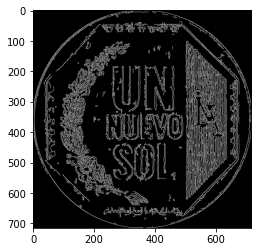

In [18]:
#@title Canny para Monedas de Referencia { run: "auto" }
op_ind = 3#@param{type:"slider", min:0, max:4, step:1}
minC = 100#@param{type:"slider", min:0, max:254, step:1}
maxC = 255#@param{type:"slider", min:0, max:255, step:1}
dfCanny(op_ind,minC,maxC)

###Calcular el valor de las monedas

In [56]:
def parte1(imMonedas,umbral=0.5,matchT=True,cv2Coef=cv2.TM_CCOEFF_NORMED):
  valInput = [0 for _ in range(len(imMonedas))] #Todas las monedas empiezan valiendo 0  
  auxInput = [-1 for _ in range(len(imMonedas))]
  f = False
  def comparar(dfRef,um):
    for j in range(len(imMonedas)):
      for i in range(len(dfRef)):
        same = False
        if matchT:  same,_ = compararImMatch(imMonedas[j],dfRef[i],um,cv2Coef)
        else:       same = compararImPearsson(imMonedas[j],dfRef[i],um)
        if same:
          valInput[j] = df_valores[i] #La imagen j ya tiene valor
          auxInput[j] = i #Guarda el indice de df que es la moneda j del input
          return True #Greedy, funciono
    return False
  k = 0
  um = umbral
  df_aux = df
  while not f:
    f = comparar(df_aux,um)
    um = um - int(k/4)*0.25
    df_aux = rotarArrIm(df_aux,cv2.ROTATE_90_CLOCKWISE)
    k += 1
  print("k para determinar al menos 1 moneda:", k)
  return valInput, auxInput

In [35]:
def parte2(circulos, valInput, auxInput, error=0.1):
  radios = circulos[:,2] # Solamente el 3er atributo (radio) de todos los circulos
  faltan = []
  ms = [] #arreglo de pendientes
  for i in range(len(circulos)):
    if auxInput[i] == -1:
      faltan.append(i)
    else:
      punto = (radios[i], df_diam[auxInput[i]] / 2 )
      ms.append(calcm((0,0),punto))
  print("Pendientes: ",ms)
  m = np.mean(ms) #.................. | Crea la función lineal, asumiendo
  escalamiento = creaymxb(m,0) #..... | siempre que 0 px = 0 mm
  for i in faltan:
    radioReal = escalamiento(radios[i])
    for j in range(len(df_diam)):
      if abs(radioReal - (df_diam[j]/2)) < error:
        valInput[i] = df_valores[j]
  return valInput

In [52]:
def merge(imGris,imFiltro,maxCanny=220,umbral=0.5,errorRadial=0.09,matchT=True,cv2Coef=cv2.TM_CCOEFF_NORMED):
  def auxP1(dfRef):
    valInput, auxInput = parte1(imMonedas,dfRef,umbral=umbral,matchT=matchT,cv2Coef=cv2Coef)
    for val in valInput:
      if val != 0:
        print("Al menos 1 moneda tiene valor")
        return True, valInput,auxInput
    return False, valInput,auxInput
  #Pre. Aplicar Hogh para Detectar círculos. Separa las posibles monedas
  circulos,_ = HoughCirculo(imFiltro,imFiltro.shape[0]/30,maxCanny,50,50,120,cv2.cvtColor(imGris,cv2.COLOR_GRAY2BGR))
  imMonedas = separarMonedas(circulos,imGris)
  print("Se hallaron %s círculos"%(len(circulos)))
  #Parte 1: Heavy. compara las imágenes input y las de referencia con Match o Pearsson.
  valInput, auxInput = parte1(imMonedas,umbral,matchT,cv2Coef)
  print("Por ahora los valores son:",valInput)
  #Parte 2: Comparación por escala de Radios. Asigna por completo a todas las monedas, a no ser que el radio sea demasiado
  #........ asume que es un error de Hough y el círculo no es moneda (muy grande o muy pequeña)
  print("Avanzamos a la parte 2")
  valInput = parte2(circulos,valInput,auxInput,errorRadial)
  total = 0
  for val in valInput:
    total += val
  
  return total,valInput,imMonedas

In [26]:
def testing(totalRes, valInput,monedasEsp, totalEsp):
  errorNcirc = abs(len(valInput) - monedasEsp)
  errorSumV = abs(totalRes - totalEsp)
  return errorNcirc, errorSumV

In [29]:
def all(input,opEdge,arrEdge=[True for _ in range(8)],c=2,usaC=False):
  baw = cv2.cvtColor(input,cv2.COLOR_RGB2GRAY)
  

0

------------------

###Cargando la imagen

In [22]:
imagen = io.imread("https://raw.githubusercontent.com/Carhuacusma/CC61_PDI_TA4_u201818067/main/monedas/fondoHoja.jpg")
print(type(imagen))

<class 'numpy.ndarray'>


In [23]:
baw = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY)

In [68]:
func = funcionFiltro(sobel_prewitt,c=2,usaC=True)


In [69]:
im_edge2 = func(imagen)

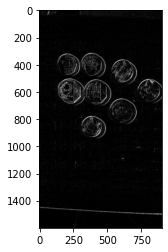

In [70]:
plt.imshow(im_edge2,cmap='gray')

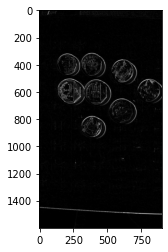

In [24]:
im_edge = edgeDetection(baw,sobel_prewitt,c=1,usaC=True)
plt.imshow(im_edge,cmap='gray')

In [58]:
total, aux1, imAuxs = merge(baw,im_edge,maxC,umbral=0.8,matchT=False)
testing(total,aux1,8,9.6)

Se hallaron 9 círculos
k para determinar al menos 1 moneda: 1
Por ahora los valores son: [0, 0, 0, 0, 0.1, 0, 0, 0, 0]
Avanzamos a la parte 2
Pendientes:  [0.10789473684210527]


(1, 9.5)

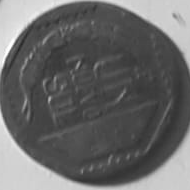

In [59]:
cv2_imshow(imAuxs[4])

In [60]:
aux1

[0, 0, 0, 0, 0.1, 0, 0, 0, 0]

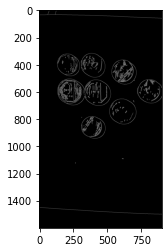

In [32]:
#@title Canny { run: "auto" }
minC = 70#@param{type:"slider", min:0, max:254, step:1}
maxC = 210#@param{type:"slider", min:0, max:255, step:1}
im_canny = cv2.Canny(baw,minC,maxC)
plt.imshow(im_canny,cmap='gray')

In [57]:
total, aux1, imAuxs = merge(baw,im_canny,maxC,umbral=0.6,matchT=False)
testing(total,aux1,8,9.6)

Se hallaron 5 círculos
k para determinar al menos 1 moneda: 1
Por ahora los valores son: [0, 0.1, 0, 0, 0]
Avanzamos a la parte 2
Pendientes:  [0.13141025641025642]


(3, 4.3)

## Conclusiones

## Bibliografía

* Sharifi, M., Fathy, M. & Tayefeh Mahmoudi, M. (2002) *A Classified and Comparative Study of Edge Detection Algorithms*. Recuperado de: https://d1wqtxts1xzle7.cloudfront.net/34225837/01000371.pdf?1405616223=&response-content-disposition=inline%3B+filename%3DA_Classified_and_Comparative_Study_of_Ed.pdf&Expires=1603141615&Signature=G5vV07WSN8ZB-lvqXGo1zZBjAzwqH4qSWBkv5CBbpmPeU47BV1rQfoMrmzLFDI8gqyLAycqoZt7bgLSA0aTgkA6C0RZDpKbXvLuwKrlVFgOBYoGp~5YEhTbKvsE7HClxTuGlG82a6hIi5RijGuzdXWMrfxfAWs3~jP5Zu92I2FVDRh-qbNWDwill--JVmLP2Gg5sKA1BEmbjJAZ7oYsbX9I8tiruHgJydaDVyOreZZ7QhnBV6yJFph7~kUZRLihJELKZtXyP84gSFrklQbkeK1V18fqDft--~dLU7sUcVURErnhXOL7M2iqcsx1dyzANUxqR6R9vC4WT12Vz3VyPdw__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA 
* Martinez, J. (2020) *Understanding and implementing shape detection using Hough Transform with OpenCV and Python*. Recuperado de: https://livecodestream.dev/post/2020-05-26-hough-transformation/ 
* Rani, R. & Kumari, S. (2016) *An approach of detecting discontinuities in images*. Recuperado de: https://pdfs.semanticscholar.org/55e0/6c28291d943aaa481ecd669bce328d54fe74.pdf 
* Programmer Sought. Roberts, Sobel, Prewitt TODO.Recuperado de: https://www.programmersought.com/article/2672737346/ 